In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
def RMS(array):
  N = len(array)
  sq = 0
  for val in array:
    sq += (val**2)
  return(math.sqrt(sq)/N)

In [ ]:
chan_2 = np.loadtxt("/content/drive/My Drive/charge_preamp_data/BF862_10us_SigOn_acq1.csv",skiprows=10, delimiter=",",usecols=1)
time = np.loadtxt("/content/drive/My Drive/charge_preamp_data/BF862_10us_SigOn_acq1.csv",skiprows=10, delimiter=",",usecols=0)

test of concept

Text(0.5, 1.0, 'BF862, 10us')

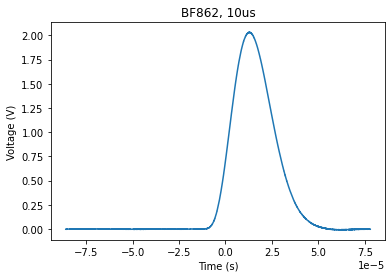

In [ ]:
plt.plot(time, chan_2)
plt.ylabel("Voltage (V)")
plt.xlabel("Time (s)")
plt.title("BF862, 10us")

In [ ]:
max = 0
end = len(chan_2)

for index in range(0, end):
  if abs(chan_2[index]) > max:
    max = abs(chan_2[index])

print(max)

2.0332763439370307


real code

In [ ]:
for val in range(1, 3):
  temp_file = np.loadtxt("/content/drive/My Drive/charge_preamp_data/BF862/10 us/BF862_10us_SigOn_acq%d.csv" % (val),skiprows=10, delimiter=",",usecols=1)
  print(temp_file[0])

-0.0023852039924410207
0.0009856546727839977


Text(0.5, 0, 'Peak values')

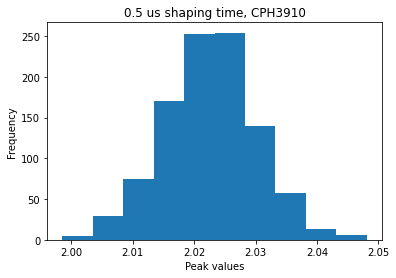

In [ ]:
max_array = []

for val in range(1, 1001):
  temp_file = np.loadtxt("/content/drive/My Drive/charge_preamp_data/CPH3910/0.5 us/CPH3910_0.5us_SigOn_acq%d.csv" % (val),skiprows=10, delimiter=",",usecols=1)
  temp_max = 0
  for elem in temp_file:
    if elem > temp_max:
      temp_max = elem
  max_array.append(temp_max)

plt.hist(max_array)
plt.title("0.5 us shaping time, CPH3910")
plt.ylabel("Frequency")
plt.xlabel("Peak values")

In [ ]:
# Conversion from V to energy (from JC's code)

V_in = 0.012 # need to check this
E_Ar = 25
C_in = 4e-12

trans = (E_Ar/(1.6e-19))*C_in*(V_in/1000)
V_T = trans/max(max_array)
FWHM = RMS(max_array) * 2.35 *V_T
print("%f keV" % (FWHM))

550.438226 keV


Text(0.5, 1.0, 'FWHM of several JFETs with shaping time')

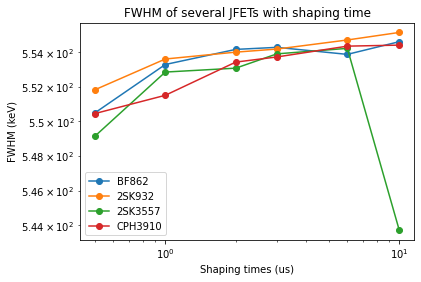

In [ ]:
#[10, 6, 3, 2, 1, 0.5]
BF862 = [554.62, 553.88, 554.29, 554.17, 553.29, 550.48]
#2SK932
SK932 = [555.16, 554.72, 554.19, 554.01, 553.61, 551.82]
#2SK3557
SK3557 = [543.73, 554.23, 553.91, 553.077, 552.85, 549.13]
#CPH3910
CPH3910 = [554.42, 554.36, 553.73, 553.43, 551.50, 550.44]
times = [10, 6, 3, 2, 1, 0.5]
plt.plot(times, BF862, label="BF862", marker = "o")
plt.plot(times, SK932, label="2SK932", marker = "o")
plt.plot(times, SK3557, label="2SK3557", marker = "o")
plt.plot(times, CPH3910, label="CPH3910", marker = "o")
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Shaping times (us)")
plt.ylabel("FWHM (keV)")
plt.title("FWHM of several JFETs with shaping time")